In [1]:
using ProRF, Printf, Statistics

In [2]:
R = RF("Data/avGFP")
X, Y, L = get_data(R, 'B', norm=true);

In [3]:
size(X)

(51715, 233)

In [4]:
RI = RFI(R, 7:1:11, 100:100:200)

RFI("Data/avGFP/data.fasta", "Data/avGFP/data.xlsx", 1, 7:1:11, 100:100:200)

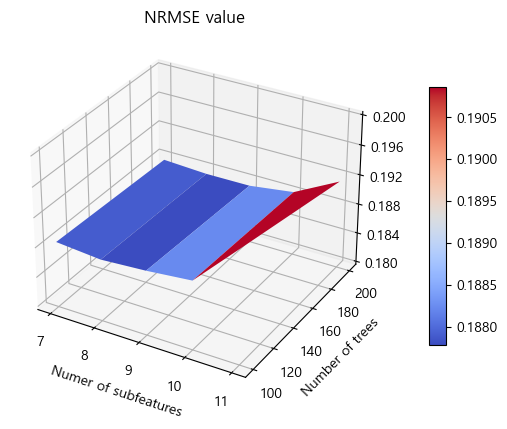

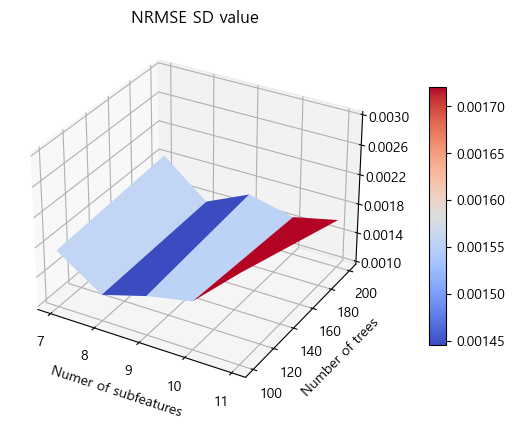

([0.18841946190172365 0.18778489221515576; 0.1878912234631328 0.18745752825443415; … ; 0.18885662125879907 0.1882983840810611; 0.1948762182860305 0.19144483668595652], [0.001727558697798648 0.00184033799265516; 0.0013137087442016417 0.0013516614240937747; … ; 0.001611910387693844 0.0014817743429409627; 0.0021742810117492133 0.001617011167500641])

In [5]:
MZ, SZ = iter_get_reg_value(RI, X, Y, 8)

In [6]:
MZ

5×2 Matrix{Float64}:
 0.188419  0.187785
 0.187891  0.187458
 0.188274  0.187484
 0.188857  0.188298
 0.194876  0.191445

In [7]:
SZ

5×2 Matrix{Float64}:
 0.00172756  0.00184034
 0.00131371  0.00135166
 0.00148887  0.00162594
 0.00161191  0.00148177
 0.00217428  0.00161701

In [11]:
data_state, learn_state = @seed, @seed

(0xe2b38f93bf22f41a, 0xd11f385b4900c02c)

In [20]:
ans = Vector{Vector{Float64}}()
for i in 1:5
    println(i)
    data_state, learn_state = @seed, @seed
    nrmse_vector = Vector{Float64}()
    for d in 240:10:300
        push!(nrmse_vector, rf_nrmse(X, Y, 8, 400, max_depth=d, val_mode=true, data_state=data_state, learn_state=learn_state)[2])
    end
    push!(ans, nrmse_vector)
end
ans = Matrix{Float64}(hcat(ans...))
sans = std.(eachrow(ans))
mans = mean.(eachrow(ans))

1

2


3


4


5

7-element Vector{Float64}:
 0.18776532945674457
 0.18766455244692323
 0.18761673344325042
 0.1875919732463341
 0.18763056489526997
 0.1876175080794622
 0.18759286552952292

In [21]:
sans

7-element Vector{Float64}:
 0.0030276031099302656
 0.002918026446062488
 0.002945258034213868
 0.0030559013290299294
 0.0030470808920284287
 0.003032443919733417
 0.00299551485514629

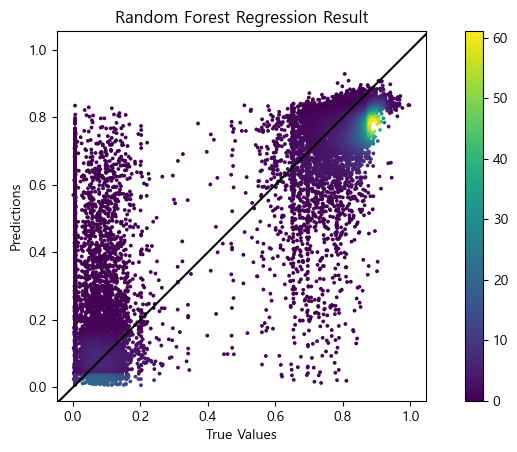

NRMSE : 0.188063


RandomForestRegressor
n_trees:             400
n_subfeatures:       8
partial_sampling:    0.7
max_depth:           270
min_samples_leaf:    1
min_samples_split:   2
min_purity_increase: 0.0
ensemble:            Ensemble of Decision Trees
Trees:      400
Avg Leaves: 14338.2825
Avg Depth:  270.0

In [7]:
rf_model(X, Y, 8, 400, max_depth=270)